# Practical 08 - Implementation of Decision Tree Algorithm on IRIS dataset

## Introduction to Decision Tree

### A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It models decisions and their possible consequences in a tree-like structure, where each internal node represents a feature (attribute), each branch represents a decision rule, and each leaf node represents an outcome (class label). The algorithm recursively splits the dataset based on feature values to create branches, aiming to maximize information gain or minimize impurity (like Gini impurity or entropy). Decision Trees are intuitive, easy to interpret, and can handle both categorical and numerical data, making them popular in various applications, including finance, healthcare, and marketing.

## Algorithm of Decision Tree

### Here’s a step-by-step algorithm for building a Decision Tree for classification tasks:

### Step 1: Data Preparation
1. **Collect Data**: Gather the dataset containing features (independent variables) and the target variable (dependent variable).
2. **Preprocess Data**:
   - **Handle Missing Values**: Impute or remove missing values as necessary.
   - **Encode Categorical Variables**: Convert categorical features into numerical format using techniques like one-hot encoding or label encoding.
   - **Feature Scaling**: Not strictly necessary for decision trees, but can be applied if needed.

### Step 2: Choose a Splitting Criterion
3. **Select Splitting Criterion**: Choose a criterion to measure the quality of splits, such as:
   - **Gini Impurity**: Measures the impurity of a split.
   - **Entropy**: Measures the information gain from a split.
   - **Mean Squared Error**: Used for regression trees.

### Step 3: Tree Construction
4. **Start from the Root Node**: Begin with the entire dataset as the root node.
5. **Recursive Splitting**:
   - For the current node, evaluate all features to determine the best split based on the chosen splitting criterion.
   - Split the dataset into subsets based on the feature that provides the highest information gain (or lowest impurity).

6. **Create Child Nodes**: For each subset created from the split, create child nodes. Repeat the process for each child node.

### Step 4: Stopping Criteria
7. **Check Stopping Conditions**: Stop the splitting process when any of the following conditions are met:
   - All instances in the node belong to the same class (pure node).
   - The maximum depth of the tree is reached.
   - The number of instances in the node is less than a predefined threshold.
   - No significant information gain can be achieved from further splits.

### Step 5: Assign Labels
8. **Assign Class Labels**: Once the stopping criteria are met, assign a class label to each leaf node based on the majority class of the instances in that node.

### Step 6: Pruning (Optional)
9. **Prune the Tree**: To avoid overfitting, prune the tree by removing nodes that provide little predictive power. This can be done through:
   - **Cost Complexity Pruning**: Remove branches that have minimal impact on overall accuracy.
   - **Post-Pruning**: Evaluate the tree on a validation set and remove nodes that reduce accuracy.

### Step 7: Model Evaluation
10. **Evaluate Model Performance**: Test the decision tree using a separate test dataset. Evaluate metrics such as accuracy, precision, recall, and F1-score to assess performance.

### Summary of Decision Tree Steps:
1. Prepare the dataset and preprocess.
2. Choose a splitting criterion.
3. Build the tree by recursively splitting the dataset.
4. Check for stopping conditions.
5. Assign class labels to leaf nodes.
6. (Optional) Prune the tree to enhance generalization.
7. Evaluate model performance.

By following these steps, you can effectively construct a Decision Tree for classification tasks and ensure its robustness and interpretability.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('dataset/iris.csv')
df.head()

,sepallen,sepalwid,petallen,petalwid,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
X = df.iloc[:, :-1]  # All columns except the last one (label)
y = df.iloc[:, -1]   # Only the last column (label)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
y_pred = dt_classifier.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy of Decision Tree: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Accuracy of Decision Tree: 100.00%


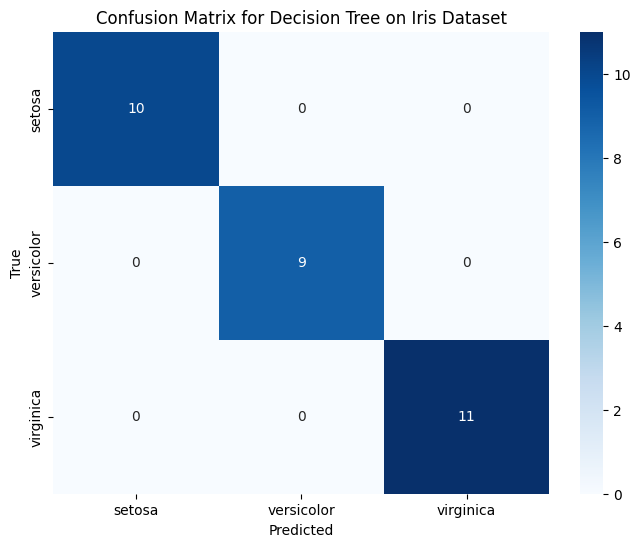

In [15]:
print(f"Accuracy of Decision Tree: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree on Iris Dataset')
plt.show()